İbrahim YÜCEL
20040301060
Veri Madenciliği
Sajjad Nematzadeh MİANDOAB
Yazılım Mühendisliği
Mühendislik Fakültesi
İstanbul Topkapı Üniversitesi

https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

Bu veri seti, lise öğrencilerinin notları ve demografik bilgileri de dahil olmak üzere matematikteki performansları hakkında bilgi içerir. Veriler Amerika Birleşik Devletleri'ndeki üç liseden toplanmıştır.

Cinsiyet,ebeveyinlerinin eğitim durumu, yazma skoru, okuma skoru vb. verilere bakarak matematik dersinden geçip geçemediğini tahmin etmeye çalışmak. Geçme notunu 60 olarak tanımladım.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from scipy.stats import ttest_ind
import random

In [9]:
df = pd.read_csv('exams.csv')

threshold = 60
df['math_pass'] = np.where(df['math score'] >= threshold, 1, 0)

cat_attr = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_attr = ['reading score', 'writing score']

for col in cat_attr:
    df[col] = df[col].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   math_pass                    1000 non-null   int32   
dtypes: category(5), int32(1), int64(3)
memory usage: 33.1 KB


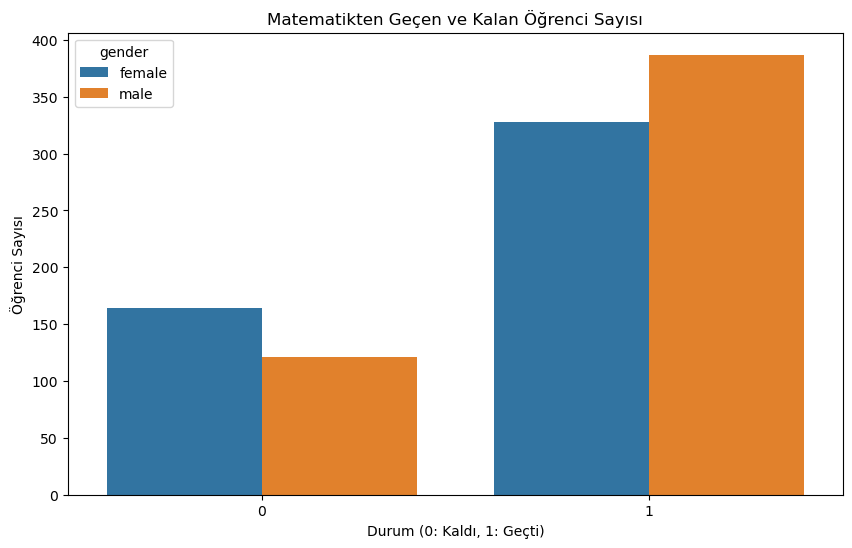

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='math_pass', data=df, hue='gender')
plt.title('Matematikten Geçen ve Kalan Öğrenci Sayısı')
plt.xlabel('Durum (0: Kaldı, 1: Geçti)')
plt.ylabel('Öğrenci Sayısı')
plt.show()

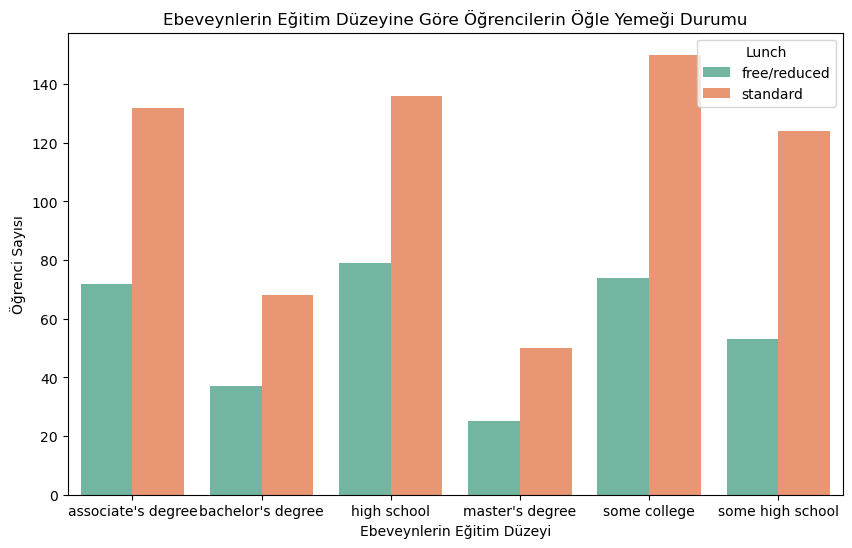

In [23]:

plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', hue='lunch', data=df, palette='Set2')
plt.title("Ebeveynlerin Eğitim Düzeyine Göre Öğrencilerin Öğle Yemeği Durumu")
plt.xlabel("Ebeveynlerin Eğitim Düzeyi")
plt.ylabel("Öğrenci Sayısı")
plt.legend(title="Lunch", loc="upper right")
plt.show()


In [38]:
algorithms = [GaussianNB(), KNeighborsClassifier(n_neighbors=5)]

metric_results_algorithm1 = {'Accuracy': [], 'F1 Score': [], 'Sensitivity': [], 'Specificity': []}
metric_results_algorithm2 = {'Accuracy': [], 'F1 Score': [], 'Sensitivity': [], 'Specificity': []}

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['math score', 'math_pass','lunch''race/ethnicity'], axis=1), 
                                                        df['math_pass'], 
                                                        test_size=0.2, random_state=random.randint(0, 100))
    
    X_train_dummy = pd.get_dummies(X_train, drop_first=True, dtype='int8')
    X_test_dummy = pd.get_dummies(X_test, drop_first=True, dtype='int8')

    for j, algorithm in enumerate(algorithms, start=1):

        algorithm.fit(X_train_dummy, y_train)
        test_preds = algorithm.predict(X_test_dummy)

        test_accuracy = accuracy_score(y_test, test_preds)
        test_f1 = f1_score(y_test, test_preds)
        test_sensitivity = recall_score(y_test, test_preds)
        conf_matrix_test = confusion_matrix(y_test, test_preds)
        test_specificity = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])

        if j == 1:
            metric_results_algorithm1['Accuracy'].append(test_accuracy)
            metric_results_algorithm1['F1 Score'].append(test_f1)
            metric_results_algorithm1['Sensitivity'].append(test_sensitivity)
            metric_results_algorithm1['Specificity'].append(test_specificity)
        elif j == 2:
            metric_results_algorithm2['Accuracy'].append(test_accuracy)
            metric_results_algorithm2['F1 Score'].append(test_f1)
            metric_results_algorithm2['Sensitivity'].append(test_sensitivity)
            metric_results_algorithm2['Specificity'].append(test_specificity)

print("Naive Bayes Algoritması")
print('Accuracy',np.mean(metric_results_algorithm1['Accuracy']))
print('F1 Score',np.mean(metric_results_algorithm1['F1 Score']))
print('Sensitivity',np.mean(metric_results_algorithm1['Sensitivity']))
print('Specificity',np.mean(metric_results_algorithm1['Specificity']))
print("---------------------------------")
print("K-Nearest Neighbors Algoritması")
print('Accuracy',np.mean(metric_results_algorithm2['Accuracy']))
print('F1 Score',np.mean(metric_results_algorithm2['F1 Score']))
print('Sensitivity',np.mean(metric_results_algorithm2['Sensitivity']))
print('Specificity',np.mean(metric_results_algorithm2['Specificity']))
print("---------------------------------")
for metric in metric_results_algorithm1.keys():
    t_statistic, p_value = ttest_ind(metric_results_algorithm1[metric], metric_results_algorithm2[metric])

    print(f"T-Test for {metric}:")
    print(f"P-Value: {p_value}")
    print("\n")


Naive Bayes Algoritması
Accuracy 0.8344999999999999
F1 Score 0.8836659921783931
Sensitivity 0.8610632121072976
Specificity 0.7631101617105329
---------------------------------
K-Nearest Neighbors Algoritması
Accuracy 0.842
F1 Score 0.8926564771022791
Sensitivity 0.900688219676962
Specificity 0.6834284560452206
---------------------------------
T-Test for Accuracy:
P-Value: 0.5695292451465757


T-Test for F1 Score:
P-Value: 0.35121823490576587


T-Test for Sensitivity:
P-Value: 0.0009596190808345443


T-Test for Specificity:
P-Value: 0.01249543272989968




T testte P value değerlerine bakarız eğer p-value değeri 0.05 ten daha küçük ise iki algoritmanın sonuçları arasında anlamlı bir fark olduğunu gösterir. İki algoritma arasında anlamlı bir fark var ise iki algoritma için bulduğumuz metrik değerlerinin ortalamasını alırız hangisi büyük ise o algoritmanın daha başarılı olduğunu varsayabiliriz.

Accuracy metrik'i için baktığımız zaman bu değer 0.05 ten büyük olduğu için iki algoritma arasında anlamlı bir farkın olmadığı kanısına varabiliriz.

F1 Score metrik'i için baktığımız zaman p-value değer yüksek olduğu için yine anlamlı bir farkın olmadığı kanısına varabiliriz.

Sensitivity metrik' ine baktığımız zaman ise p-value değeri 0.05 değerinden küçük olduğu için iki algoritma arasında anlamlı bir fark olduğu kanısına varabilir. İki algoritma arasında ortalaması daha büyük olan K-Nearest Neighbor algoritmasının daha başarılı olduğunu söyleyebiliriz.

Specifity metrik' ine baktığımız zaman ise p-value değeri çok küçük olduğundan dolayı yine anlamlı bir fark olduğu kanısına varabiliriz. Ama bu sefer ortalamaları incelediğimizde Naive Bayes Algoritmasının ortalamasının daha büyük olduğu ve daha başarılı bir sonuç döndürdüğü kanısına varabiliriz.